In [7]:
import pandas as pd
from collections import Counter


In [8]:
movie_df=pd.read_csv('cleaned_data.csv')
movie_df.head(5)

,title,rated,released,runtime,director,writer,actors,plot,language,country,...,boxoffice,response,genre,star,budget,gross,year,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating
0,Inception,PG-13,2010-07-16,148,Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",A thief who steals corporate secrets through t...,"English, Japanese, French","United Kingdom, United States",...,292576195.0,True,Action,Leonardo DiCaprio,160000000.0,836836967.0,2010,8.8,87.0,74.0
1,Iron Man 2,PG-13,2010-05-07,124,Jon Favreau,"Justin Theroux, Stan Lee, Don Heck","Robert Downey Jr., Mickey Rourke, Gwyneth Paltrow",With the world now aware of his identity as Ir...,"English, French, Russian",United States,...,312433331.0,True,Action,Robert Downey Jr.,200000000.0,623933331.0,2010,7.0,72.0,57.0
2,Shutter Island,R,2010-02-19,138,Martin Scorsese,"Laeta Kalogridis, Dennis Lehane","Leonardo DiCaprio, Emily Mortimer, Mark Ruffalo","In 1954, a U.S. Marshal investigates the disap...","English, German",United States,...,128012934.0,True,Mystery,Leonardo DiCaprio,80000000.0,294805697.0,2010,8.2,68.0,63.0
3,Scott Pilgrim vs. the World,PG-13,2010-08-13,112,Edgar Wright,"Michael Bacall, Edgar Wright, Bryan Lee O'Malley","Michael Cera, Mary Elizabeth Winstead, Kieran ...","In a magically realistic version of Toronto, a...",English,"United States, United Kingdom, Canada, Japan",...,32777690.0,True,Action,Michael Cera,60000000.0,48917974.0,2010,7.5,82.0,69.0
4,Grown Ups,PG-13,2010-06-25,102,Dennis Dugan,"Adam Sandler, Fred Wolf","Adam Sandler, Salma Hayek, Kevin James",After their high school basketball coach passe...,"English, Spanish",United States,...,162001186.0,True,Comedy,Adam Sandler,80000000.0,271457301.0,2010,6.0,11.0,30.0


In [9]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   title                           1774 non-null   object 
 1   rated                           1753 non-null   object 
 2   released                        1774 non-null   object 
 3   runtime                         1774 non-null   int64  
 4   director                        1766 non-null   object 
 5   writer                          1771 non-null   object 
 6   actors                          1774 non-null   object 
 7   plot                            1774 non-null   object 
 8   language                        1771 non-null   object 
 9   country                         1773 non-null   object 
 10  awards                          1654 non-null   object 
 11  metascore                       1774 non-null   float64
 12  imdbrating                      17

In [10]:
#Searching for most used words in title and plot
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from IPython.display import Image, HTML

title_corpus = ' '.join(movie_df['title'])
plot_corpus = ' '.join(movie_df['plot'])

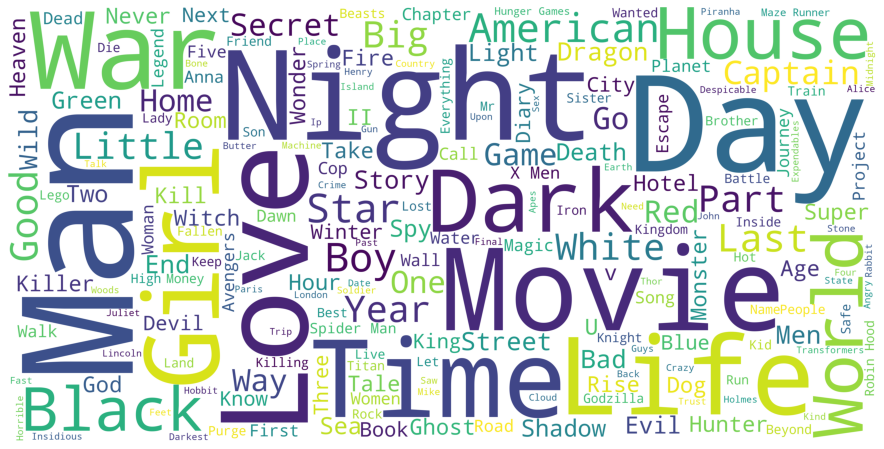

In [11]:
# plotting wordclod for title

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

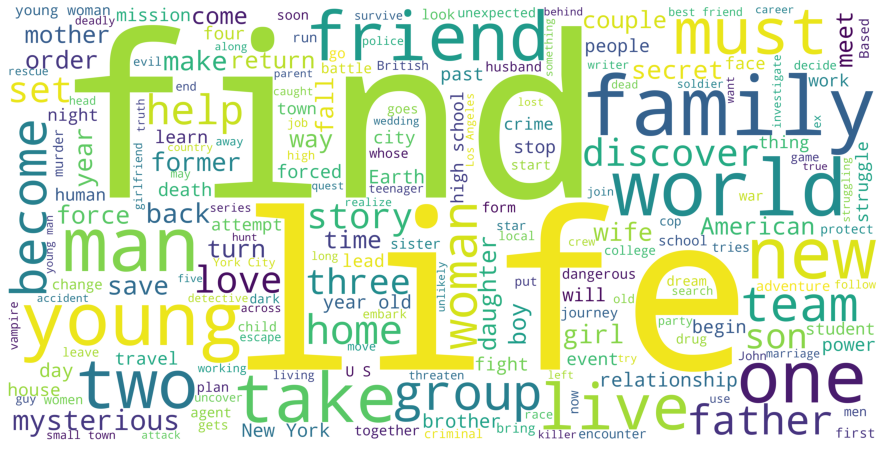

In [12]:
#plotting word cloud fot movie plots

plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(plot_corpus)
plt.figure(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.show()

## Countries with most production

In [13]:
countries=movie_df['country'].to_list()

In [14]:
country_list=[]

for x in countries:
    
        country_array = str(x).split(',')
        for y in country_array:
            y=y.strip()
            country_list.append(y)

In [15]:
countries_most_production=pd.DataFrame(Counter(country_list).most_common(10))
countries_most_production.columns=['Country','Count']
countries_most_production

,Country,Count
0,United States,1485
1,United Kingdom,380
2,France,191
3,Canada,184
4,China,93
5,Germany,89
6,Australia,65
7,Japan,63
8,India,56
9,Spain,47


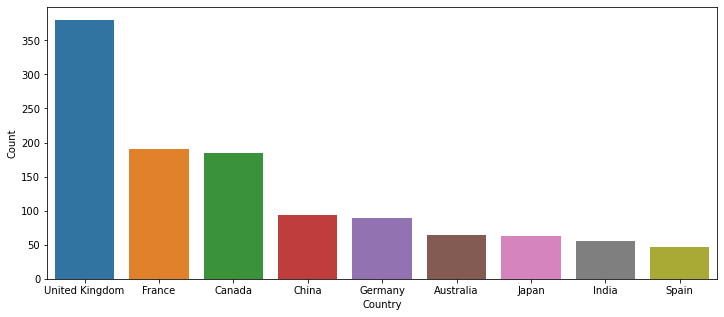

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.barplot(x='Country', y='Count', data=countries_most_production.iloc[1:10])
plt.show()

## Most used languages

In [17]:
languages=movie_df['language'].to_list()

In [18]:
language_list=[]

for x in languages:
    
        language_array = str(x).split(',')
        for y in language_array:
            y=y.strip()
            language_list.append(y)

In [19]:
most_used_languages= pd.DataFrame(Counter(language_list).most_common(10))
most_used_languages.columns=['Laguage','Count']
most_used_languages

,Laguage,Count
0,English,1677
1,Spanish,222
2,French,208
3,German,132
4,Russian,107
5,Italian,84
6,Japanese,78
7,Mandarin,56
8,Hindi,55
9,Arabic,48


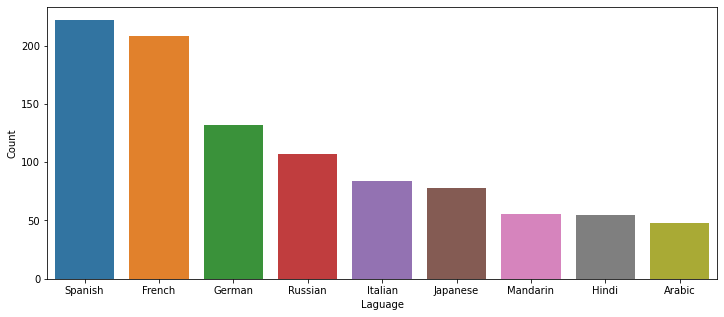

In [20]:
plt.figure(figsize=(12,5))
sns.barplot(x='Laguage', y='Count', data=most_used_languages.iloc[1:10])
plt.show()

### Checking Distribution of imdbrating

In [21]:
movie_df['imdbrating'].describe()

count    1774.000000
mean        6.535457
std         0.883080
min         2.200000
25%         6.000000
50%         6.600000
75%         7.200000
max         8.800000
Name: imdbrating, dtype: float64

/Users/Mimi/opt/anaconda3/envs/venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='imdbrating', ylabel='Density'>

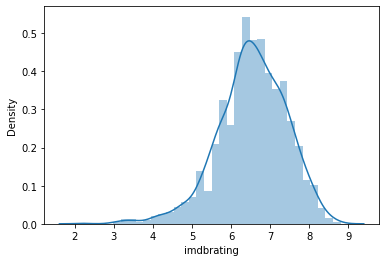

In [22]:
sns.distplot(movie_df['imdbrating'])

### Searching more corelated columns with imdb rating

In [26]:
score_df= movie_df[['imdbvotes','boxoffice','budget','gross','metascore','imdbrating','internet_movie_database_rating','rotten_tomato_rating','metacritic_rating']]

corr = score_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,imdbvotes,boxoffice,budget,gross,metascore,imdbrating,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating
imdbvotes,1.000000,0.680483,0.551815,0.642377,0.313106,0.451652,0.451652,0.287468,0.313106
boxoffice,0.680483,1.000000,0.722155,0.911370,0.169221,0.206332,0.206332,0.146010,0.169221
budget,0.551815,0.722155,1.000000,0.784985,0.064433,0.092982,0.092982,0.005359,0.064433
gross,0.642377,0.911370,0.784985,1.000000,0.136701,0.207146,0.207146,0.131744,0.136701
metascore,0.313106,0.169221,0.064433,0.136701,1.000000,0.544940,0.544940,0.789362,1.000000
imdbrating,0.451652,0.206332,0.092982,0.207146,0.544940,1.000000,1.000000,0.662932,0.544940
internet_movie_database_rating,0.451652,0.206332,0.092982,0.207146,0.544940,1.000000,1.000000,0.662932,0.544940
rotten_tomato_rating,0.287468,0.146010,0.005359,0.131744,0.789362,0.662932,0.662932,1.000000,0.789362
metacritic_rating,0.313106,0.169221,0.064433,0.136701,1.000000,0.544940,0.544940,0.789362,1.000000


## Checking if there is any strong positive relation between imdb rating and imdb votes

In [14]:
score_df= movie_df[['imdbvotes','boxoffice','budget','gross','metascore','imdbrating','internet_movie_database_rating','rotten_tomato_rating','metacritic_rating']]

corr = score_df.corr()
corr.style.background_gradient(cmap='coolwarm')


,imdbvotes,boxoffice,budget,gross,metascore,imdbrating,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating
imdbvotes,1.000000,0.680483,0.551815,0.642377,0.313106,0.451652,0.451652,0.287468,0.313106
boxoffice,0.680483,1.000000,0.722155,0.911370,0.169221,0.206332,0.206332,0.146010,0.169221
budget,0.551815,0.722155,1.000000,0.784985,0.064433,0.092982,0.092982,0.005359,0.064433
gross,0.642377,0.911370,0.784985,1.000000,0.136701,0.207146,0.207146,0.131744,0.136701
metascore,0.313106,0.169221,0.064433,0.136701,1.000000,0.544940,0.544940,0.789362,1.000000
imdbrating,0.451652,0.206332,0.092982,0.207146,0.544940,1.000000,1.000000,0.662932,0.544940
internet_movie_database_rating,0.451652,0.206332,0.092982,0.207146,0.544940,1.000000,1.000000,0.662932,0.544940
rotten_tomato_rating,0.287468,0.146010,0.005359,0.131744,0.789362,0.662932,0.662932,1.000000,0.789362
metacritic_rating,0.313106,0.169221,0.064433,0.136701,1.000000,0.544940,0.544940,0.789362,1.000000


## Median budget in each genre

In [15]:
imdb_feedback=movie_df[['imdbrating','imdbvotes']]

## Median gross amout for each genre

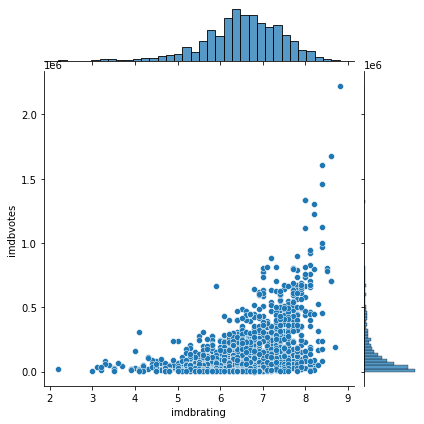

In [24]:
sns.jointplot(x='imdbrating', y='imdbvotes', data=movie_df)

### median budget in each genre

In [25]:
movie_df.groupby('genre')['budget'].median().nlargest(16)

genre
Animation    75500000.0
Action       46000000.0
Romance      37600000.0
Mystery      32000000.0
Sci-Fi       27000000.0
Adventure    25000000.0
Biography    15000000.0
Comedy       13500000.0
Fantasy      12000000.0
Crime        10000000.0
Thriller      8000000.0
Horror        5000000.0
Drama         3500000.0
Family              0.0
Musical             0.0
Sport               0.0
Name: budget, dtype: float64

In [27]:
movie_df.groupby('genre')['gross'].median().nlargest(16)

genre
Animation    289319940.5
Sci-Fi       161849455.0
Mystery      135558194.0
Action       108098767.5
Adventure     83110217.0
Romance       66834176.5
Thriller      52425855.0
Horror        39051010.0
Fantasy       31595883.0
Comedy        30642704.0
Biography     24740061.0
Drama         11122090.0
Crime          9374932.0
Musical        2595346.0
Sport          1067629.0
Family           20941.0
Name: gross, dtype: float64

### Median imdb votes in each genre

In [19]:
movie_df.groupby('genre')['imdbvotes'].median().nlargest(16)

genre
Sci-Fi       552473.0
Romance      317905.5
Mystery      204982.0
Action       129118.0
Adventure     86522.0
Animation     82333.5
Fantasy       76053.0
Comedy        59559.0
Horror        56481.0
Crime         55165.0
Drama         47747.0
Biography     47595.0
Thriller      20261.0
Sport           821.0
Musical         595.0
Family          185.0
Name: imdbvotes, dtype: float64

### Median runtime in each genre

In [20]:
movie_df.groupby('genre')['runtime'].median().nlargest(16)

genre
Musical      145.0
Mystery      117.0
Biography    116.0
Action       112.5
Adventure    112.0
Romance      111.0
Crime        110.0
Drama        109.0
Sci-Fi       105.0
Comedy       102.0
Fantasy       99.5
Animation     96.0
Horror        95.0
Sport         94.0
Family        91.0
Thriller      91.0
Name: runtime, dtype: float64

### Statistical tests